In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch
import pandas as pd
import torch.nn as nn
import os
import json

from utils.dataloader  import FaceDataset, preprocess, postprocess
from utils.learning import testing, training, scores
from utils.utils_data import train_validation_test_split
from utils.visiualisation import display_graph_learning, grid_image_data_set
from torch.utils.data import DataLoader
from torch.optim import Adam, SGD
from models.resnet import ResnetCustomModel
from tqdm import tqdm
from collections import OrderedDict
from json import JSONEncoder

torch.cuda.empty_cache()

In [2]:
faceDataset = FaceDataset(preprocess(), is_classification=True)
train_sampler, validation_sampler, test_sampler = train_validation_test_split(faceDataset, test_size=0.2)

In [3]:
train_loader = DataLoader(faceDataset, batch_size=32, sampler=train_sampler)
test_loader = DataLoader(faceDataset, batch_size=32, sampler=test_sampler)

In [4]:
model_class_with_weight = torch.load('models/resnet_custom_weight_classi.pt')

In [5]:
results, y_pred, y_true = testing(model_class_with_weight, nn.MSELoss(), is_classification=True, test_validation=test_loader, DEVICE='cuda')

Test: 100%|██████████| 271/271 [00:59<00:00,  4.58it/s]

[-] Test loss 1.064023


In [6]:
print(y_pred)

[ 0. 16.  8. ...  6. 10. 12.]


In [7]:
matrix, scores_ensemble, roc_plot = scores(y_true=y_true, y_pred=y_pred, is_classification=False)
scores_ensemble

,MAE,error
0,0.747024,0.928866


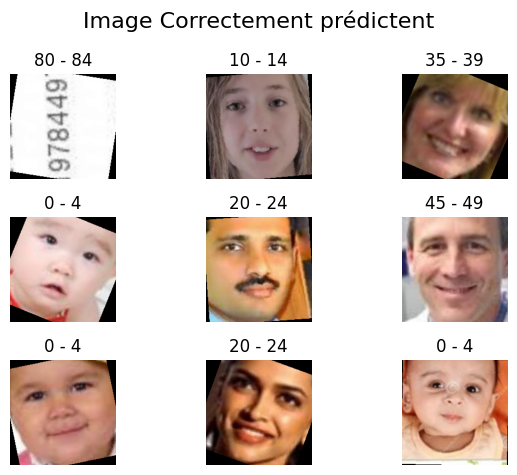

In [8]:

grid_image_data_set(results['images_correct'][:9], results['label_correct'][:9],"Image Correctement prédictent")

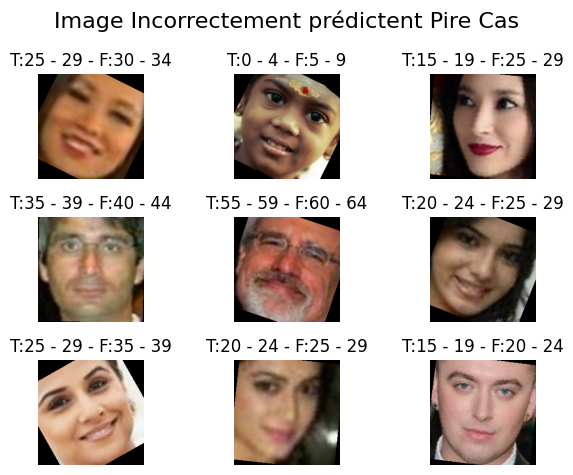

In [9]:
grid_image_data_set(results['images_incorrect'][:9], results['label_incorrect'][:9], "Image Incorrectement prédictent Pire Cas")